<a href="https://colab.research.google.com/github/giuliagromano/Machine_Learning_Models_for_Dementia_Patient_Identification/blob/main/MachineLearning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROGETTO MACHINE LEARNING
 **Studenti:
Romano Giulia Gelsomina N39001348,
Perfetta Vito Daniele N39001372**


Lo scopo del progetto è l'addestramento tramite vari modelli di Machine Learning per identificare i pazienti con demenza.

I dati impiegati fanno riferimento ad OASIS Brains Datasets, Oasis-2.

**Importare le librerie utili:**

In [ ]:
#libreria di sistema
import sys

#libreria per analisi di dati
import pandas

#libreria per plot grafici
import matplotlib
import matplotlib.pyplot as plt

#libreria per analisi statistiche
import seaborn as sns

#librerie calcolo matematico
import numpy as np
import scipy

#libreria dedicata al Machine Learning
import sklearn
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

#dizionario dei classificatori scelto:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#libreria necessaria a visualizzare regioni decisionali della regressione
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

#libreria dedicata ai grafici(necessaria alla raprresentazione del decisiontree)
import graphviz

Di seguito sono riportare le versione delle librerie utilizzate

In [ ]:
print('Versione Python: {}'.format(sys.version))
print('Versione libreria scipy: {}'.format(scipy.__version__))
print('Versione libreria numpy: {}'.format(np.__version__))
print('Versione libreria matplotlib: {}'.format(matplotlib.__version__))
print('Versione libreria pandas: {}'.format(pandas.__version__))
print('Versione libreria sklearn: {}'.format(sklearn.__version__))
print('Versione libreria graphviz: {}'.format(graphviz.__version__))
print('Versione libreria seaborn: {}'.format(sns.__version__))

Versione Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Versione libreria scipy: 1.4.1
Versione libreria numpy: 1.21.6
Versione libreria matplotlib: 3.2.2
Versione libreria pandas: 1.3.5
Versione libreria sklearn: 1.0.2
Versione libreria graphviz: 0.10.1
Versione libreria seaborn: 0.11.2


#ANALISI DEI DATI

Le informazioni fornite fanno riferimento ai seguenti campi:
1.   ID del paziente
2.   MRI ID -> identificativo della risonanza magnetica
3.   Group -> Demented, Non-Demented, Converted (Non Demented rivalutati Demented alla visita medica successiva)
4.   Visited -> numero di visite effettuate
5.   MR delay -> tempo trascorso dall'ultima visita
6.   Sesso -> Maschio o Femmina
7.   Hand-> Mano Dominante Destra o Sinistra
8.   Età
9.   EDUC -> Anni di educazione scolastica
10.   SES -> Status Socioeconomico
11.  MMSE -> Mini Mental State Examination (test per valutare stato neuro-cognitivo e funzionale del paziente)
12.   CDR -> Clinical Dementia Rating (scala numerica che indica gravità della demenza)
13.   eTIV -> stima del volume intracranico
14.   nWBV -> volume cranico normalizzato
15.  ASF -> Atlas Scaling Factor (confronto rispetto dimensioni craniche di riferimento secondo modello Atlas)




In [ ]:
#Caricare il dataset in formato csv in un pandas dataframe chiamato 'dati'
dati = pandas.read_csv("/content/oasis_longitudinal.csv")

#Verifica correttezza delle dimensioni dataset
print('Dimensioni dataframe: {}'.format(dati.shape))

#Verifica correttezza dati
print('Dataframe dati:\n {}'.format(dati))

Dimensioni dataframe: (373, 15)
Dataframe dati:
     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR 

E' possibile osservare che il dataset è stato esaminato su un campione di età caratterizzato da una media di 77 anni:

In [ ]:
print ('Age:\n{}'.format(dati['Age'].describe()))

Age:
count    373.000000
mean      77.013405
std        7.640957
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64


Inoltre, risulta che la maggior parte dei soggetti testati sono delle donne:

In [ ]:
print(dati.groupby('M/F').size())

M/F
F    213
M    160
dtype: int64


Valutando graficamente rispetto ad età e sesso:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


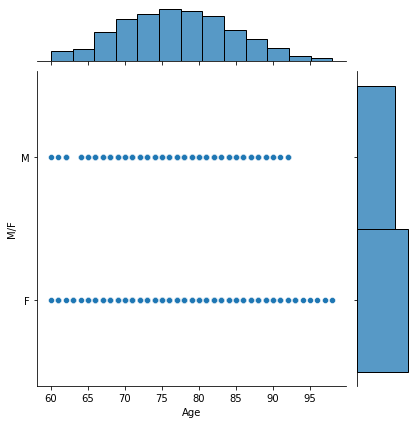

In [ ]:
sns.jointplot(x="Age",y="M/F",data=dati,size=6)

Tramite degli istogramma è possibile osservare come variano i parametri del dataset: il numero di visite, MR delay, Età, Educazione, Situazione SocioEconomica, MMSE, CDR, eTIV, nWBv, ASF.

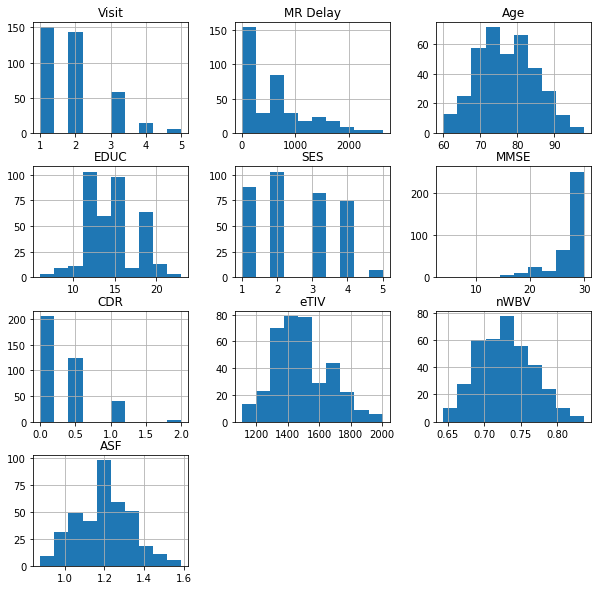

In [ ]:
dati.hist(bins=10,figsize=(10,10))
plt.show()

#PRE-ELABORAZIONE DEI DATI

Scelta delle features:

E' possibile osservare che alcuni ID si ripetono, questo perchè lo stesso paziente è stato visitato più volte (il numero è indicato da visited) per ricevere successive diagnosi.
Per utilizzare l'intero dataset si possono valutare come se fossero pazienti differenti. Non ha dunque senso prendere in ingresso le features Visited e Mr Delay.

In [ ]:
#Si rimuovono le colonne non necessarie al fine della valutazione dello stato del paziente:
dati1 = dati.drop(['Subject ID','MRI ID','MR Delay','Visit'], axis=1)

In [ ]:
#Poichè i pazienti analizzati sono tutti Right Hand, la colonna Hand risulta superflua
print(dati1.groupby('Hand').size())
dati2 = dati1.drop(['Hand'], axis=1)


Hand
R    373
dtype: int64


In [ ]:
#Per la creazione del modello, è necessario sostituire tutti i valori alfabetici con valori numerici:
#Sostituire i NaN presenti in ASF e in MMSE con 0 , in questo modo si intede che la situazione patrimoniale non è
#conosciuta e non è stato eseguito il testo MMSE
dati3 = dati2.replace(np.nan,0)

#Sostituire con valori numeri M/F, in modo da aver M=1 e F=0
dati3['M/F'] = dati3['M/F'].replace(['F','M'], [0,1])


In [ ]:
#Dalle informazioni in allegato al dataset, segue che i converted sono pazienti valutati inizialmente nondemented e poi rivalutati demented,
#sono quindi caratterizzabili come demented:
dati3['Group'] = dati3['Group'].replace(['Converted'], ['Demented'])

print('Dataframe con modifiche:\n ')
dati3

Dataframe con modifiche:
 


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,Demented,1,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,Demented,1,80,12,0.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
#Convertire il dataframe pandas 'dati3' in un array numpy
array = dati3.values

#Scegliere 'Group' come etichetta da predirre
target = array[:,0]

#Applicazione di una maschera per avere Demented=1 ed i Non-demented=0
yd = np.where(target=='Demented',1,0)
print('yd: \n', yd)

yd: 
 [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 0 0 0]


#ULTERIORE ANALISI DATI

Group        M/F
Demented     0       84
             1       99
Nondemented  0      129
             1       61
Name: Group, dtype: int64


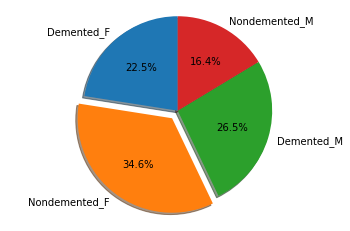

In [ ]:
#Ulteriore analisi rispetto al Sesso e Group in un Pie Plot

#Creazione di una matrice con solo le features di Group e M/F
array2 = array[:,[0,1]]

#La funzione groupby si può applicare solo ad un dataframe, quindi:
df = pandas.DataFrame(array2, columns = ["Group","M/F"])
print(df.groupby(["Group","M/F"])["Group"].count())

#Considerando sempre M=1 e F=0, si ricava il numero rispettivamente di Demented_F, Demented_M, Nondemented_F, Nondemented_M
#e si costruisce il pie plot
labels = 'Demented_F','Nondemented_F', 'Demented_M',  'Nondemented_M'
sizes = [84, 129, 99, 61]
expand = [0, 0.1, 0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = expand, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


#MATRICE DELLE FEATURES

In [ ]:
#Si scelgono le features da fornire in ingresso, in particolare sono: Sesso, Età, condizione socio-economica,
#Educazione, MMSE, CDR, eTIV, nWBv, ASF.
X = array[:,1:10]
print('Tipo di X: ', type(X))
print('Dimensioni di X: ', X.shape)
print('Matrice delle features X: \n', X)

Tipo di X:  <class 'numpy.ndarray'>
Dimensioni di X:  (373, 9)
Matrice delle features X: 
 [[1 87 14 ... 1987 0.696 0.883]
 [1 88 14 ... 2004 0.681 0.876]
 [1 75 12 ... 1678 0.736 1.046]
 ...
 [0 61 13 ... 1319 0.801 1.331]
 [0 63 13 ... 1327 0.796 1.323]
 [0 65 13 ... 1333 0.801 1.317]]


#Costruisco il Training Set e il Test Set per valutare i Demented

In [ ]:
#Scegliere la percentuale di valori da nascondere per il Test Set
dim_test = 0.25

#Tramite la funzione train_test_split del modulo model_selection, si divide la matrice delle features X in training set e testing set
#data la percentuale di valori usate come test (dim_test) in maniera randomica (random_state = 7)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,yd,test_size=dim_test,random_state=7)


print ('Dimensions of X_train: ', X_train.shape)
print ('Head of X_train: \n', X_train[:10])
print ('Dimensions of X_test:  ', X_test.shape)
print ('Head of X_test:  \n', X_test[:10])
print ('Dimensions of y_train: ', y_train.shape)
print ('Head of y_train: ', y_train[:10])
print ('Dimensions of y_test:  ', y_test.shape)
print ('Head of y_test:  ', y_test[:30])

Dimensions of X_train:  (279, 9)
Head of X_train: 
 [[0 88 12 4.0 30.0 0.0 1336 0.738 1.313]
 [0 82 18 2.0 30.0 0.0 1471 0.69 1.193]
 [0 78 12 0.0 27.0 1.0 1309 0.709 1.341]
 [0 75 12 3.0 29.0 0.0 1338 0.747 1.312]
 [0 63 15 2.0 28.0 0.0 1544 0.805 1.136]
 [1 69 12 2.0 24.0 0.5 1480 0.791 1.186]
 [0 78 12 3.0 29.0 0.0 1475 0.731 1.19]
 [1 61 18 1.0 30.0 1.0 1957 0.734 0.897]
 [0 73 13 4.0 30.0 0.0 1360 0.773 1.291]
 [0 71 16 3.0 30.0 0.0 1503 0.788 1.168]]
Dimensions of X_test:   (94, 9)
Head of X_test:  
 [[1 73 20 2.0 30.0 0.0 1842 0.758 0.953]
 [0 95 14 2.0 29.0 0.0 1257 0.703 1.396]
 [0 66 18 2.0 29.0 0.0 1191 0.785 1.474]
 [1 78 18 2.0 30.0 0.0 1484 0.703 1.183]
 [1 90 8 4.0 23.0 0.5 1668 0.646 1.052]
 [1 81 12 3.0 27.0 0.5 1814 0.759 0.968]
 [0 71 14 2.0 28.0 0.0 1461 0.756 1.202]
 [0 86 12 3.0 30.0 0.0 1430 0.718 1.227]
 [0 63 13 2.0 30.0 0.0 1327 0.796 1.323]
 [0 72 13 2.0 30.0 0.0 1510 0.723 1.162]]
Dimensions of y_train:  (279,)
Head of y_train:  [0 0 1 0 0 1 1 1 0 0]
Dimensi

#CREAZIONE MODELLO

Per il modello, veranno valutati due differenti metodi: LogisticRegression e DecisionTree.

Si sceglierà quello più performante per effettuare un test su un utente di cui si voglia effettuare una predizione.

### I METODO: LOGISTIC REGRESSION

La regressione lineare individua la retta che meglio separa i valori in ingresso. Si può quindi applicare tale ragionamento per realizzare un classificatore:

In [ ]:
#Fase di Learning dal training set
model1 = LogisticRegression()
model1.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Fase di Predizione
y_pred1 = model1.predict(X_test)

#Fase di Valutazione
#Generazione matrice di confusione per verificare quanto è affidabile il modello
cm1 = confusion_matrix(y_pred1,y_test)
print ('Matrice di confusione I metodo')
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', cm1[1,1], '    ', cm1[1,0])
print ('Actually Negative (0): ', cm1[0,1], '    ', cm1[0,0])


Matrice di confusione I metodo
                        Predicted
                   Positive Negative
Actually Positive (1):  47      1
Actually Negative (0):  4      42


In [ ]:
#Accuracy con il I metodo del modello
print('Accuracy: ', accuracy_score(y_pred1,y_test))

Accuracy:  0.9468085106382979


E' possibile mostrare il meccanismo della regressione lineare su un grafico 2D limitandosi a 2 sole variabili categoriali. Si prendano ad esempio Età e Sesso

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


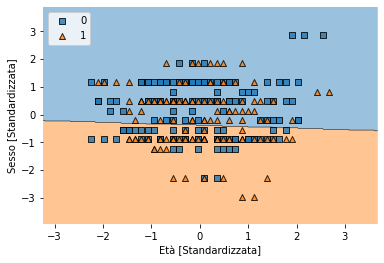

In [ ]:
X2D = array[:,2:4]
X_train2D, X_test2D, y_train2D, y_test2D = model_selection.train_test_split(X2D,yd,test_size=0.25,random_state=7)
# i valori devono essere standardizzati poichè X_trin2D è visto come un oggetto, mentre le regioni decisionali richiedono un array float o int

sc = StandardScaler()
sc.fit(X_train2D)
X_std = sc.transform(X2D)
X_trainV2 = sc.transform(X_train2D)
X_test_std = sc.transform(X_test2D)

model2D = LogisticRegression()
model2D.fit(X_trainV2, y_train2D)
plot_decision_regions(X_trainV2, y_train2D, clf=model2D, legend=2)
plt.xlabel('Età [Standardizzata]')
plt.ylabel('Sesso [Standardizzata]')
plt.legend(loc='upper left')
plt.show()
#(Demented=1, Non-demented=0)

Quelle mappate sono le regioni di classificazione, tuttavia è possibile osservare come, con le sole due features scelte come esempio, il comparatore non lavora molto bene.

In [ ]:
y_pred2D = model2D.predict(X_test2D)
print('Accuracy: ', accuracy_score(y_pred2D,y_test2D))

Accuracy:  0.4574468085106383


### II METODO: DECISION TREE

In [ ]:
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(y_pred2,y_test)
print ('Matrice di confusione II metodo')
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', cm2[1,1], '    ', cm2[1,0])
print ('Actually Negative (0): ', cm2[0,1], '    ', cm2[0,0])
print('Accuracy: ', accuracy_score(y_pred2,y_test))

Matrice di confusione II metodo
                        Predicted
                   Positive Negative
Actually Positive (1):  48      4
Actually Negative (0):  3      39
Accuracy:  0.925531914893617


In [ ]:
#il codice sottostante è stato ricavato da "https://www.kaggle.com/code/esignor/decision-tree/notebook" e adattato alle
#specifiche del nostro problema
def DT_attribute(decision_tree):
    data_DT = tree.export_graphviz(decision_tree, out_file=None,
    feature_names=['M/F',	'Age',	'EDUC',	'SES',	'MMSE',	'CDR',	'eTIV',	'nWBV',	'ASF'], # nome delle caratteristiche
    class_names=['Demented', 'Non-Demented'], # nome delle classi target
    filled=True, # dipinge i nodi per indicare la classe di maggioranza per la classificazione
    rounded=True, # fa i riquadri dei nodi con angoli arrotondati
    special_characters=True) # i caratteri speciali sono per compatibilità PostScript
    graph_DT = graphviz.Source(data_DT)
    return graph_DT # stampa del DT


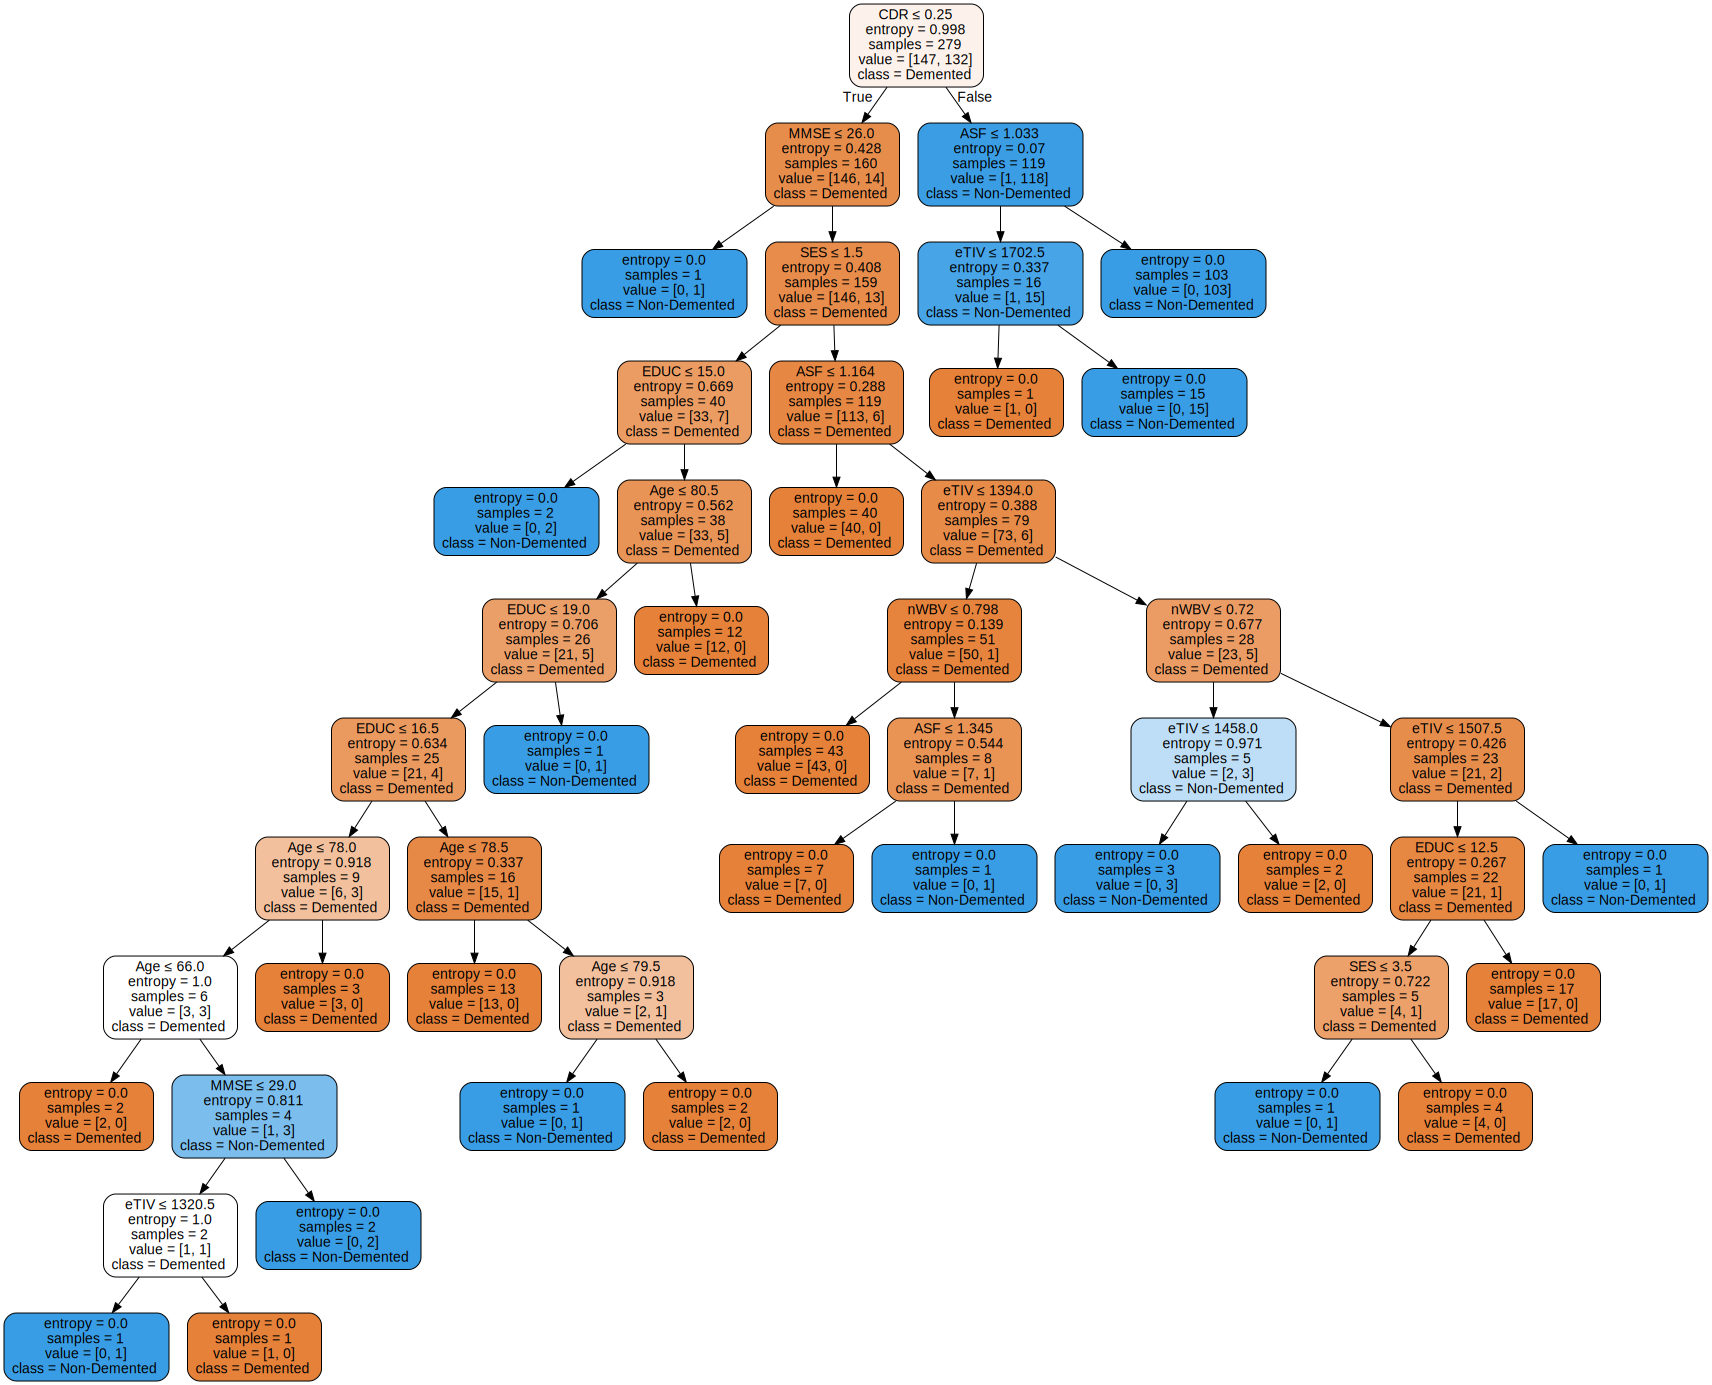

In [ ]:
DT_attribute(model2)

### PICCOLO ESPERIMENTO

Il I metodo risulta essere migliore in termini di accuracy, quindi uso quest'ultimo per testare il modello. Inserisco un nuovo soggetto e predico se, tramite i dati, il paziente sarà o meno demente.

In [ ]:
paziente = np.array([[0, 74, 2.0, 13, 29.0, 0.0, 1344.0, 0.743, 1.306]])
pred_paziente = model1.predict(paziente)
if pred_paziente == 1:
  print("Il paziente è demente")
else:
  print("Il paziente non è demente")

Il paziente non è demente
